

#  Investigate a Dataset (No_Shows_Medical_Appointment)

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this project, I will analyze <a href="https://www.google.com/url?q=https%3A%2F%2Fd17h27t6h515a5.cloudfront.net%2Ftopher%2F2017%2FOctober%2F59dd2e9a_noshowappointments-kagglev2-may-2016%2Fnoshowappointments-kagglev2-may-2016.csv&sa=D&source=docs">No-show appointments Dataset</a> .
This dataset collects information from 100k medical appointments (2014-2016) in Brazil and is focused on the question of whether or not patients show up for their appointment. 
### columns description
<ol>
    <li><h6>ScheduledDay</h6> tells us on what day the patient set up their appointment.</li>
    <li><h6>Neighborhood</h6> indicates the location of the hospital.</li>
    <li><h6>Scholarship</h6> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li><h6>Hypertension</h6> indicates whether or not the patient has Hypertension or not .</li>
    <li><h6>Diabetes</h6> indicates whether or not the patient has Diabetes or not .</li>
    <li><h6>Alcoholism</h6> indicates whether or not the patient has Alcoholism or not .</li>
    <li><h6>Handicap</h6> indicates whether or not the patient is Handicapped or not .</li>
    <li><h6>SMS_received</h6> indicates whether or not the patient received Sms or not .</li>
    <li><h6>No-show</h6> ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up</li>
    </ol>


### Questions
here is a list of questions that I will  answer  during my analysis to predict if the patient  will show up or not 
<ul>
<li><a href="#q1">What is the relation between ScheduledDay, AppointmentDay, and No-shows, Does the longest the gap between ScheduledDay, AppointmentDay the more likely the patient will not show up or not?  </a></li>
<li><a href="#q2">what is the gender that has the most rate of showing up?</a></li>
<li><a href="#q3">does receiving SMS has an effect on showing up?</a></li>
<li><a href="#q4">what age group has the most rate of showing up? </a></li>
 <li><a href="#q5">which day of the week has the most rate of Not showing up? </a></li> 
</ul>

In [1]:
#  import  for all of the packages that I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



In [2]:
#Read a (csv) file into DataFrame.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#print the first `5` rows.
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# to check number of rows and columns
df.shape

(110527, 14)

shape Attribute shows that we have in the dataframe 110527 Rows and 14 columns to work with

In [4]:
# info() displays information about the data frame like column type ,column name number of rows , number of value for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


info() shows that there are no missing values.

In [5]:
#  sum() will count the duplicateds row (the True value returned by duplicated())
df.duplicated().sum()

0

no duplicated rows.

In [6]:
# nunique() will count how many unique value for each columns 
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**Handcap** column seems to have more than 2 values when supposed to have <=2 
we can investigate more and check the corrupted value

In [7]:
# value_counts() will count the rows for every value existed on Handcap column
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

look like we have 199 corrupted value/rows

In [8]:
# to check the rows that have Handcap value not 0 or 1
df[df['Handcap']>=2]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282580e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242920e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242920e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242920e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491830e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387210e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589490e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662980e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522190e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


I think the best solution is to fill them with 1 , since they have positive number and not zero

In [9]:
# describe() return statistics for each column 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 We can see that the **Age**  column has -1 in one of the rows so we should fix it in the Data Cleaning 



### Data Cleaning 
in this section, I will do data Cleaning, 
here is a list of things that should be fixed
<ul>
    <li><a href=#another_cell>Removing of columns that will not be usfull in the analysis</a></li>
    <li><a href=#another_cell2>Renaming columns names to lowercase to make it easy to work with</a></li>
    <li><a href=#another_cell3>Removing of rows that has corrupted age value</a></li>
       <li><a href=#another_cell4>changing No-show column data type to int to make easy it to work with 0 for No 1 for Yes</a></li>
           <li> <a href=#another_cell5>Changing ScheduledDay ,AppointmentDay column data type from String to Date</a></li>
             <li> <a href=#another_cell6> fill up the corrupted Handicap value with 1</a></li>
    </ul>

<a id='another_cell'></a>
**Removing PatientId & AppointmentID columns**

In [10]:
# Removing of columns that will not be usfull in the analysis
# drop() will drop the given labels with operation inplace 

df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)


In [11]:
# to check if columns correctly dropped
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Everything good. let's continue 

<a id='another_cell2'></a>
**Renaming columns names to lowercase**

In [12]:
# replace (-) with  underscores and lowercase 
df.rename(columns=lambda k: k.strip().lower().replace("-", "_"), inplace=True)

In [13]:
# to check if it correctly renamed
df.head(0)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


Everything good. let's continue 

<a id='another_cell3'></a>
**Removing corrupted rows**

In [14]:
# firstly lets inspect correpted rows more, we  can query it using query()
df.query('age <0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


since its only 1 row, we can leave it or drop it ,  it will not make big different

In [15]:
# we can drop it using drop() and send its index in the parameter, axis 0 to indicate that it is a row, inplace=True to do operation inplace
df.drop(99832,axis=0,inplace=True)
# to check if it correctly dropped
df.query('age <0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


it was dropped correctly, let's continue

<a id='another_cell4'></a> 
**changing No-show column data type**


In [16]:
# to make sure that we are good after the changes will get the how many "No" and "Yes" We have
yes=df[df['no_show']=="Yes"].shape[0]
no=df[df['no_show']=="No"].shape[0]
yes,no

(22319, 88207)

In [17]:
# now we should replace No with 0 and Yes with 1 we can do that with repkace()
df.replace(to_replace='Yes' , value =1, inplace=True)
df.replace(to_replace='No' , value =0, inplace=True)

In [18]:
# changing no_show data type to int
df['no_show'] = df['no_show'].astype(int)

In [19]:
# to check if the changes made correctly
df.dtypes

gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no_show            int32
dtype: object

In [20]:
one=df[df['no_show']==1].shape[0]
zeros=df[df['no_show']==0].shape[0]
zeros==no,one==yes

(True, True)

Great!

<a id='another_cell5'></a>
**changing ScheduledDay ,AppointmentDay column data type from String to Date**

In [21]:
# changing ScheduledDay datatype to Date
df['scheduledday']=pd.to_datetime(df['scheduledday'])

In [22]:
# changing appointmentday datatype to Date
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [23]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [24]:
# checking that change is made correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hipertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   handcap         110526 non-null  int64              
 10  sms_received    110526 non-null  int64              
 11  no_show         110526 non-null  int32              
dtypes: datetime64[ns, UTC](2), int32(1), int64(7), object(2)
memory usage: 1

Good , one more cleaning left to go

<a id='another_cell6'></a>
**fill up the corrupted Handicap value with 1**

In [25]:
# replace corrupted Handicap value with 1 
df.replace({'handcap': [2,3,4]},1,inplace=True)

In [26]:
# checking that change is made correctly
df.handcap.value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

<a id=q1></a>

### What is the relation between ScheduledDay, AppointmentDay, and No-shows, Does the longest the gap between ScheduledDay, AppointmentDay the more likely the patient will not show up or not?

In [27]:
# first, I will get the time that patient had to wait before his appointment 
waiting_period=df.appointmentday-df.scheduledday
waiting_period

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

In [28]:
# creating new column named waiting_days with type int in the dataframe
df['waiting_days']=waiting_period.astype('timedelta64[D]').astype(int)


In [29]:
# to check  calculations
df.head(90)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,F,2016-04-26 13:34:14+00:00,2016-04-29 00:00:00+00:00,69,RESISTÊNCIA,0,1,0,0,0,0,0,2
86,M,2016-04-18 12:31:34+00:00,2016-04-29 00:00:00+00:00,10,ILHA DE SANTA MARIA,0,0,0,0,0,1,0,10
87,M,2016-04-18 12:32:25+00:00,2016-04-29 00:00:00+00:00,2,ILHA DE SANTA MARIA,0,0,0,0,0,0,0,10
88,M,2016-04-18 12:32:35+00:00,2016-04-29 00:00:00+00:00,1,JUCUTUQUARA,0,0,0,0,0,0,0,10


Everything seems to be fine, but I think that I will add an extra 1 day for every row to  remove negative(-1) values

In [30]:
# add an extra 1 day for every row to remove negative values
df['waiting_days']+=1
df.head(90)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,F,2016-04-26 13:34:14+00:00,2016-04-29 00:00:00+00:00,69,RESISTÊNCIA,0,1,0,0,0,0,0,3
86,M,2016-04-18 12:31:34+00:00,2016-04-29 00:00:00+00:00,10,ILHA DE SANTA MARIA,0,0,0,0,0,1,0,11
87,M,2016-04-18 12:32:25+00:00,2016-04-29 00:00:00+00:00,2,ILHA DE SANTA MARIA,0,0,0,0,0,0,0,11
88,M,2016-04-18 12:32:35+00:00,2016-04-29 00:00:00+00:00,1,JUCUTUQUARA,0,0,0,0,0,0,0,11


<AxesSubplot:>

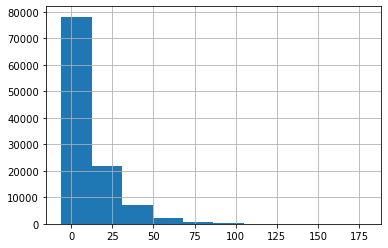

In [31]:
# check the distribution of the waiting_days
df.waiting_days.hist()

since the distribution skewed to the left, 
it's better for the measures of the center that I use the median to split the data into two groups and then compare their attended/unattended rate between the two groups.

In [32]:
df.waiting_days.median()

4.0

In [33]:
# select group with waiting_days less than the median
less_wait=df[df['waiting_days']<4]
# select group with waiting_days more or equal than the median
more_wait=df[df['waiting_days']>=4]
less_wait.shape[0]+more_wait.shape[0]==df.shape[0] # should be true


True

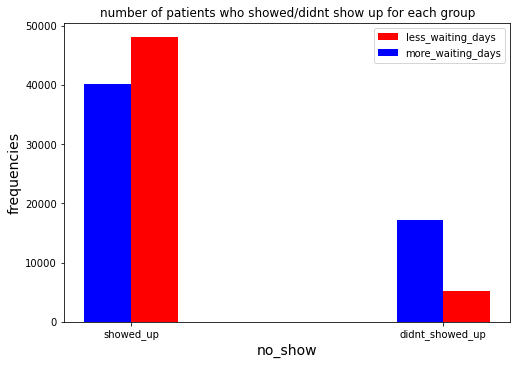

In [34]:
# the bar graph to check which group didn't show up more in their appointment
plt.rcParams["figure.figsize"] = (8,5.5)# to re size the figure
fig, ax = plt.subplots()
df1=less_wait.groupby('no_show').count()['gender']
df2=more_wait.groupby('no_show').count()['gender']
index = np.arange(len(df1))
plt.bar(index, df1, label = 'less_waiting_days',color='r', align='edge', width=.15)
plt.bar(index, df2,label = 'more_waiting_days', color='b', align='edge', width=-.15)
# adding the tick labels
plt.xticks(index)
ax.set_xticklabels(['showed_up','didnt_showed_up'])
plt.xlabel('no_show',fontsize=14)
plt.ylabel('frequencies',fontsize=14)
plt.title('number of patients who showed/didnt show up for each group')
plt.legend()
plt.show()

looks like the number of people who had more waiting days and didn't show up  is larger than those who had fewer and didn't show up
however, it does not indicates that they don't show up more because the number of rows is different, we should investigate more

In [35]:
# functions that callculate attended proportions 
def prop(df1):
 v= df1.groupby('no_show').count()['gender']/df1.count()['gender']
 return v

In [36]:
#a function that creates a bar chart 
def bar(df1,df2,label1,label2,title):
    fig, ax = plt.subplots()
    index = np.arange(len(df1))
    plt.bar(index, df1,label = label1, color='r', align='edge', width=.15)
    plt.bar(index, df2,label = label2, color='b', align='edge', width=-.15)
# adding the tick labels
    plt.xticks(index)
    ax.set_xticklabels(['showed_up','didnt_showed_up'])
    plt.xlabel('no_show',fontsize=14)
    plt.ylabel('proportions',fontsize=14)
    plt.title(title)
    plt.legend()
    plt.show()

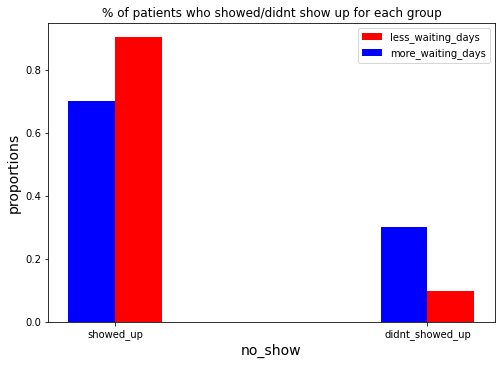

In [37]:
# taking proportions 
proportions =prop(less_wait)
proportions1 =prop(more_wait)
#create bar chart
bar(proportions,proportions1,'less_waiting_days','more_waiting_days','% of patients who showed/didnt show up for each group')


as we can see from this chart  we can say that  the people who waited **4 days** or more for their appointment are more likely to not show up than those who waited less than **4 days**
<p></p>
the people who who waited less than <b>4 days</b> are more likely to  show up with <b>90%</b> attended rate than  who waited 4>= days for their appointment with <b>70%</b> attended rate

<a id=q2></a>
### what is the gender that has the most rate of showing up?

In [56]:
# creating two dataframe for each gender
df_Male=df[df['gender']=='M']
df_Female=df[df['gender']=='F']
df.shape[0]==df_Female.shape[0]+df_Male.shape[0]# must be true

True

In [57]:
# % of men to show up
M_showup=df_Male[df_Male['no_show']==0].count()['age']/df_Male.count()['age']

In [58]:
# % of females to show up
F_showup=df_Female[df_Female['no_show']==0].count()['age']/df_Female.count()['age']

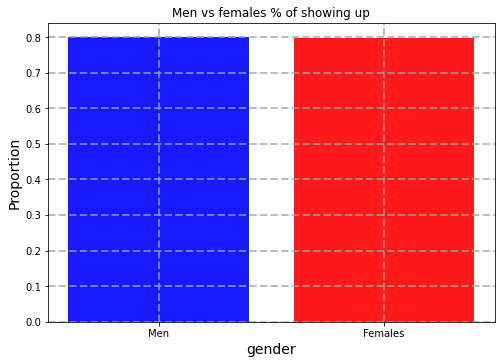

In [59]:
# creating a bar chart
data=[M_showup,F_showup]
plt.bar(range(len(data)),data,color=['b','r'],alpha=0.9)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2,  alpha=0.7)
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('gender',fontsize=14)
plt.xticks(range(len(data)), ['Men','Females'])
plt.title('Men vs females % of showing up')
plt.show()

it looks like the attended rate for Men are a little more than the Females to show up for their appointment
but we can't say that for sure because they are quite similar 
I think we can investigate more about this by considering another variable of the gender
the age of the gender for example


<a id=q3></a>
### does receiving SMS has an effect on showing up?

In [60]:
# creating dataframe for people receved SMS
df_SMS_receved=df.query('sms_received==1')
df_SMS_receved.shape[0]

35482

In [61]:
# getting attendance rate for people receved SMS
proportions=prop(df_SMS_receved)
proportions

no_show
0    0.724255
1    0.275745
Name: gender, dtype: float64

In [62]:
# creating a data frame for people have not received SMS
df_SMS_Nreceved=df.query('sms_received==0')
df_SMS_Nreceved.shape[0]

75044

In [63]:
# getting attendance rate for people have not received SMS
proportions1=prop(df_SMS_Nreceved)
proportions1

no_show
0    0.832965
1    0.167035
Name: gender, dtype: float64

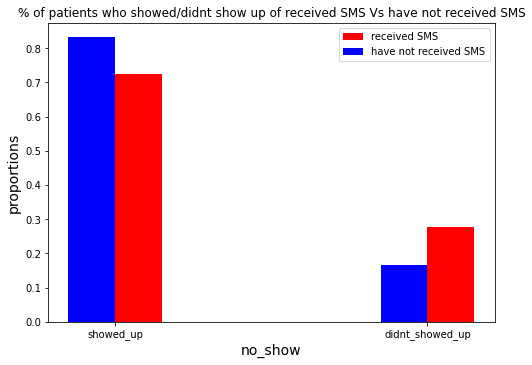

In [64]:
# creating bar chart
bar(proportions,proportions1,'received SMS','have not received SMS','% of patients who showed/didnt show up of received SMS Vs have not received SMS')

the chart shows the percentage of people who have not received SMS but showed up in the appointment is higher than those who received SMS by 12%
<ul>
    <li>people have not received SMS 84% showed up</li>
<li>people  received SMS 72% showed up</li>
    </ul>
it was unexpected to me but maybe there are others factors that affected the result

In [65]:
# getting mean of waiting_days for people received SMS and wnd who have not received SMS
df_SMS_receved.waiting_days.mean(),df_SMS_Nreceved.waiting_days.mean()

(19.016712699396876, 6.007448963274879)

we can see the average waiting_days for people who have not received SMS is much smaller than who received

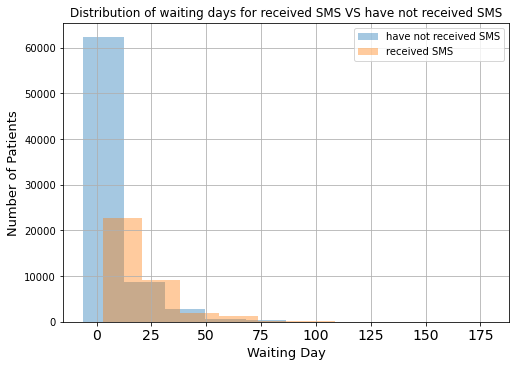

In [66]:
# creating histgram to show the Distribution of waiting days for received SMS VS have not received SMS
df_SMS_Nreceved.waiting_days.hist(alpha=0.4, label= 'have not received SMS')
df_SMS_receved.waiting_days.hist(alpha=0.4, label= 'received SMS')
plt.xlabel('Waiting Day',fontsize=13)
plt.ylabel('Number of Patients',fontsize=13)
plt.title('Distribution of waiting days for received SMS VS have not received SMS')
plt.legend()
plt.xticks(fontsize=14)
plt.show()

we can see that the people who haven't received SMS most of them booked their appointment on the same day of the appointment and that increased their percentage of showing up in their appointment

In [67]:
#getting the % of people haven't received SMS and booked their appointment on the same day of the appointment
df_SMS_Nreceved[df_SMS_Nreceved['waiting_days']==0].shape[0]/df_SMS_Nreceved.shape[0]

0.5138585363253558

51% of people who haven't received SMS  booked their appointment on the same day

<a id=q4></a>
### what age group has the most rate of Not showing up?

In [68]:
# creating a binning column (age_group) 
bins=[-1,18,37,55,115]
df['age_group']=pd.cut(df['age'], bins=bins)# to cut age data into group
df.age_group.value_counts()

(-1, 18]     28866
(55, 115]    27504
(18, 37]     27250
(37, 55]     26906
Name: age_group, dtype: int64

In [69]:
# getting the proportions of not showing for each age_group
proportions=df.groupby('age_group')['no_show'].mean()
proportions

age_group
(-1, 18]     0.219878
(18, 37]     0.235376
(37, 55]     0.195310
(55, 115]    0.156450
Name: no_show, dtype: float64

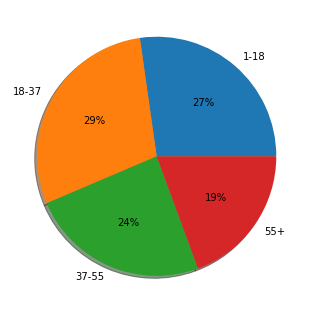

In [71]:
# creating a pie chart showing the age_group with rate of not showing up
labels=['1-18','18-37','37-55','55+']
plt.pie(proportions,labels=labels,shadow = True,autopct = '%.f%%')
plt.show() 


the pie chart shows that people aging from 18-37 have the highest rate of not showing up
while people from 55+ have the highest rate of showing up 

<a id=q5></a>
### which day of the week has the most rate of Not showing up?

In [72]:
# creating new column 'weekday'
df['weekday'] = df['appointmentday'].dt.dayofweek # convertig datetime to weekday
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days,age_group,weekday
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,"(55, 115]",4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,"(55, 115]",4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,"(55, 115]",4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,"(-1, 18]",4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,"(55, 115]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,35,"(55, 115]",1
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,35,"(37, 55]",1
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,41,"(18, 37]",1
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,41,"(37, 55]",1


In [73]:
# checking which day has the most number of appointments
df.weekday.value_counts()

2    25867
1    25640
0    22714
4    19019
3    17247
5       39
Name: weekday, dtype: int64

Wednesday has the most number of appointments

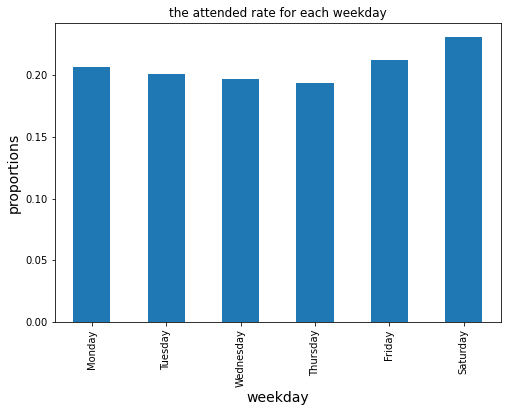

In [74]:
# creating bar chart shows the attended rate for each weekday
df.groupby('weekday')['no_show'].mean().plot.bar()
plt.ylabel('proportions',fontsize=14)
plt.xlabel('weekday',fontsize=14)
plt.title('the attended rate for each weekday')
plt.xticks(range(len(df.groupby('weekday')['no_show'].mean())), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

the chart shows that Saturday has the most rate of patients Not showing up,
but we checked earlier that it has only 39 rows so its hard to tell that confidently also it's not part of weekdays
so I would say **Friday has the most rate of patients Not showing up**



<a id='conclusions'></a>
## Conclusions
<p>
in the end, I would like to say that I enjoyed working on this project and will keep improving it 
    <p>here is a list of  my overall finding</p>
              <h4> Findings</h4>
              <ul>
    <li>people who waited less than 4 days for their appointment  show up more with a <b>90%</b> attended rate</li>
    <li>people who waited 4 days or more show up less for their appointment with <b>70%</b> attended rate</li>
    <li>people who have not received SMS show up more with <b>84%</b> attended rate</li>
     <li>people who have  received SMS show up less with <b>72%</b> attended rate</li>
    <li>most of the people who have not received SMS book their appointment on the same day of the appointment <b>51%</b>
    <li>people aging from 18-37 have the highest rate of not showing up <b>29%</b></li>
    <li>people aging from 55+ tend to show up more with a <b>81%</b> attended rate</li>
     <li>patient gender has no effect on attending </li>
    <li>Friday has the most rate of patients Not showing up with <b>22%</b> Not showing up rate </li>
    </ul>
    <p></p>
    <h4>limitations</h4>
            <ul>
    <li>it was hard for me to show different charts instead of the bar, or pie charts.
 I tried using a scatter plot that I learned in the previous lesson but it was hard for me to use it since most of the variables were boolean so I couldn't find the relation between the variables. 
    </ul>




<p> I'm eager to receive your feedback.</p>     
<h4>prepared by</h4>
<h5> Abdullah Alluhaidan</h5>